In [24]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

In [4]:
chexpert_df = pd.read_csv('/content/chexpert_df_multilabel.csv', index_col = 0)
nih_df = pd.read_csv('/content/nih_df_multilabel.csv', index_col = 0)

In [5]:
chexpert_df.rename(columns = {'Lung Opacity': 'Opacity', 
                              'Pleural Effusion': 'Effusion'}, inplace = True)

nodule, mass = list(nih_df['Nodule']), list(nih_df['Mass'])
nih_df['Nodule/Mass'] = nodule or mass
nih_df = nih_df.drop(['Nodule', 'Mass'], axis = 1)

In [8]:
columns = ['Dataset', 'Path', 'Sex', 'Label Type', 'No Finding', 'Opacity', 
           'Atelectasis', 'Pneumothorax', 'Effusion', 'Nodule/Mass']

chexpert_df['Nodule/Mass'] = [0.0] * len(chexpert_df)
nih_df['Opacity'] = [0.0] * len(nih_df)

chexpert_df = chexpert_df[columns]
nih_df = nih_df[columns]
all_datasets = pd.concat((chexpert_df, nih_df))

In [10]:
dict(all_datasets[finding].value_counts())

{0.0: 54867}

Text(0, 0.5, 'Imagens')

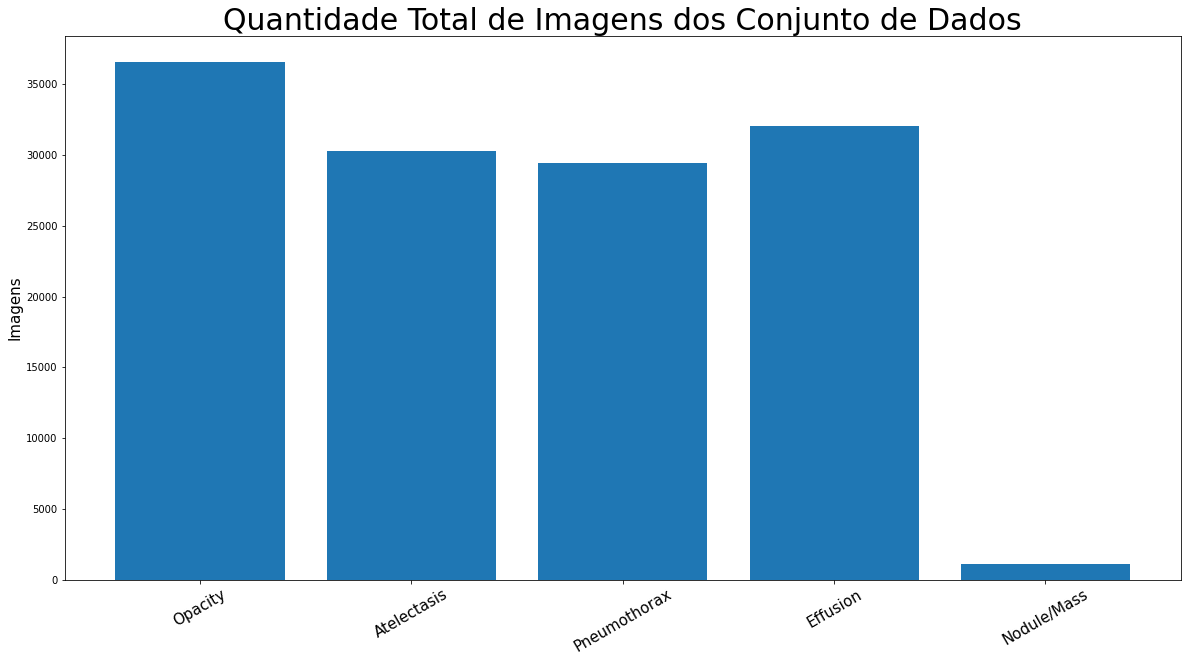

In [12]:
count_findings = list()
for finding in columns[5:]:
  count = dict(all_datasets[finding].value_counts())[1.0]
  count_findings.append(count)

plt.figure(figsize = (20, 10))
plt.bar(columns[5:], count_findings)
plt.xticks(rotation = 30, size = 15)
plt.title('Quantidade Total de Imagens dos Conjunto de Dados', size = 30)
plt.ylabel('Imagens', size = 15)

In [19]:
all_datasets.to_csv(path_or_buf = 'all_datasets_multilabel.csv', columns = columns)
datasets_multiclass = pd.read_csv('/content/all_datasets_multiclass.csv', 
                                  index_col = 0)
datasets = pd.concat((all_datasets,datasets_multiclass))

Text(0, 0.5, 'Imagens')

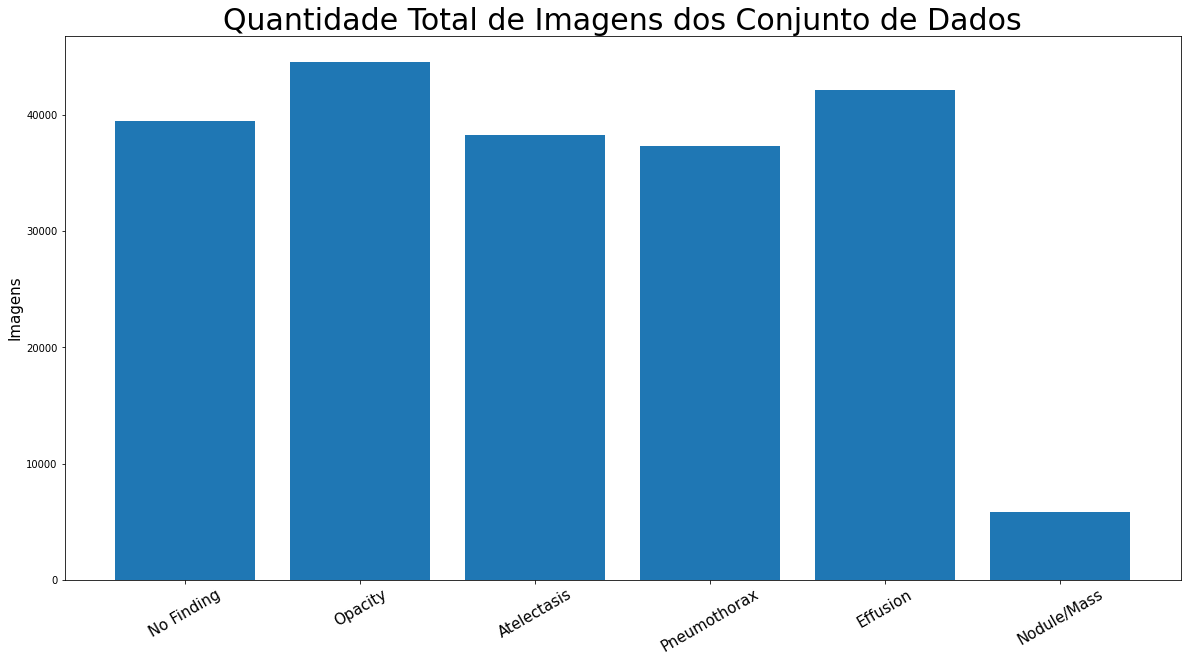

In [47]:
count_findings = list()
for finding in columns[4:]:
  count = dict(datasets[finding].value_counts())[1.0]
  count_findings.append(count)

plt.figure(figsize = (20, 10))
plt.bar(columns[4:], count_findings)
plt.xticks(rotation = 30, size = 15)
plt.title('Quantidade Total de Imagens dos Conjunto de Dados', size = 30)
plt.ylabel('Imagens', size = 15)

In [21]:
datasets.to_csv(path_or_buf = 'all_datasets.csv', columns = columns)

In [27]:
no_finding = np.array(datasets['No Finding']).astype(str)
opacity = np.array(datasets['Opacity']).astype(str)
atelectasis = np.array(datasets['Atelectasis']).astype(str)
pneumothorax = np.array(datasets['Pneumothorax']).astype(str)
effusion = np.array(datasets['Effusion']).astype(str)

all_labels = np.zeros(effusion.shape).astype(str)
for index in range(0, len(no_finding)):
  all_labels[index] = no_finding[index] + opacity[index] + atelectasis[index]
  all_labels[index] = all_labels[index] + pneumothorax[index] + effusion[index]

datasets['labels_ref'] = all_labels

In [32]:
f_train, f_val = train_test_split(datasets, test_size = 0.2, random_state = 42, 
                                  stratify = datasets['labels_ref'])
f_val, f_test = train_test_split(f_val, test_size = 0.5, random_state = 42, 
                                  stratify = f_val['labels_ref'])

In [44]:
dict(f_train[finding].value_counts())

{0.0: 103422, 1.0: 4700}

Text(0, 0.5, 'Imagens')

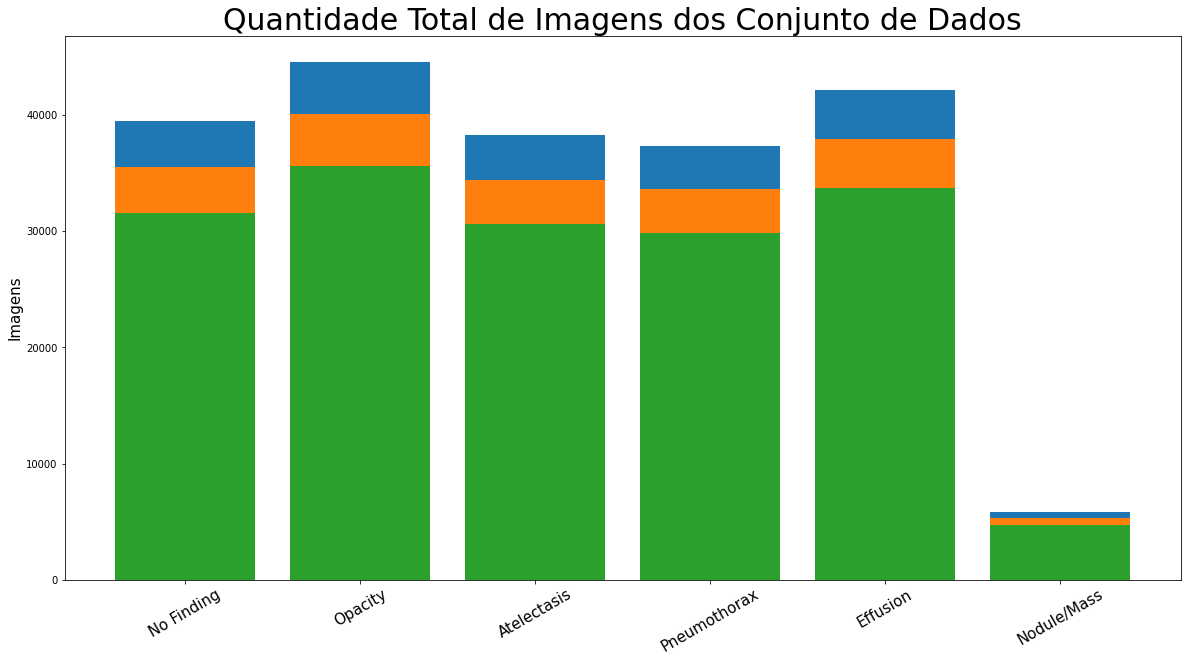

In [56]:
count_train, count_val, count_test = [], [], []
for finding in columns[4:]:
  c_train = dict(f_train[finding].value_counts())[1.0]
  c_val = dict(f_val[finding].value_counts())[1.0]
  c_test = dict(f_test[finding].value_counts())[1.0]
  count_train.append(c_train), count_val.append(c_val), count_test.append(c_test)

plt.figure(figsize = (20, 10))
plt.bar(columns[4:], np.sum((count_train, count_val, count_test), axis = 0))
plt.bar(columns[4:], np.sum((count_train, count_val), axis = 0))
plt.bar(columns[4:], count_train)
plt.xticks(rotation = 30, size = 15)
plt.title('Quantidade Total de Imagens dos Conjunto de Dados', size = 30)
plt.ylabel('Imagens', size = 15)

In [57]:
f_train.to_csv(path_or_buf = 'train_all.csv', columns = columns)
f_test.to_csv(path_or_buf = 'test_all.csv', columns = columns)
f_val.to_csv(path_or_buf = 'val_all.csv', columns = columns)